In [25]:
import numpy as np
from scipy.io import wavfile
import pandas as pd

AUDIOLOG = "test01"
SAMPLERATE = 10161


raw_audio = pd.read_csv(AUDIOLOG + ".log", header=None, encoding='unicode_escape')
fil_audio = []    

noisy_items = 0
for item in list(raw_audio[0]):
    try:
        fil_audio.append(np.int16(item))
    except ValueError:
        noisy_items += 1
        
print("Num noisy items: {}".format(noisy_items))
    
fil_audio = np.array(fil_audio).astype(np.int16)

# Attempt to normalize the signal from the MCU to create something like the wav files in the snips dataset
#padding = int(data.shape[0] / 50.0)
#fil_audio = fil_audio[padding:-padding]
#mean = fil_audio.mean()
#std = fil_audio.std()

#fil_audio = fil_audio - mean
#fil_audio = fil_audio / np.max(np.abs(fil_audio)) * 0.7 * np.iinfo(np.int16).max


wavfile.write(AUDIOLOG + ".wav", SAMPLERATE, fil_audio.astype(np.int16))

samplerate, data = wavfile.read(AUDIOLOG + ".wav")

import IPython
IPython.display.Audio(AUDIOLOG + ".wav", rate=samplerate)
        

Num noisy items: 1


<function matplotlib.pyplot.show(close=None, block=None)>

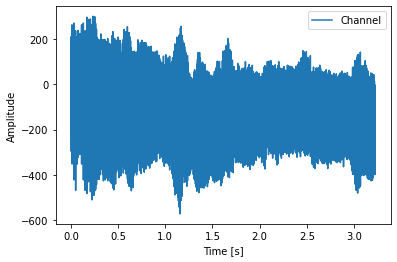

In [26]:
import matplotlib.pyplot as plt
length = fil_audio.shape[0] / samplerate
time = np.linspace(0., length, fil_audio.shape[0])
plt.plot(time, fil_audio, label="Channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show

In [172]:
# Calculate sampling rate and min baudrate for different FOSR and INPUT DIVIDER combinations
FOSR=32
INPUT_DIVIDER=256
sampling_rate = 80000000 / float(FOSR * INPUT_DIVIDER)
min_baudrate = sampling_rate * 16
print("Sampling rate: {:.2f}".format(sampling_rate))
print("Min baudrate needs to be: {:.2f}".format(min_baudrate))

Sampling rate: 9765.62
Min baudrate needs to be: 156250.00


In [173]:
# To check how a good wav file sounds and looks like

from scipy.io import wavfile

    
AUDIOWAV = "example_wav"
NEW_AUDIOWAV = "example_wav_resampled"
SAMPLERATE = 32000
    
samplerate, data = wavfile.read(AUDIOWAV + ".wav")

wavfile.write(NEW_AUDIOWAV + ".wav", SAMPLERATE, data.astype(np.int16))

import IPython
IPython.display.Audio(NEW_AUDIOWAV + ".wav", rate=SAMPLERATE)

<function matplotlib.pyplot.show(close=None, block=None)>

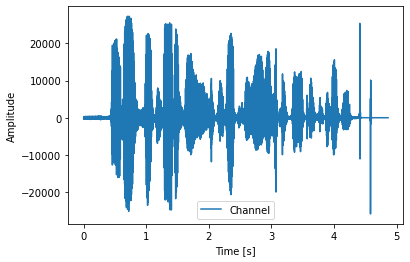

In [174]:
import matplotlib.pyplot as plt
length = data.shape[0] / samplerate
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data, label="Channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show